In [2]:
# Imports
import os
import fitz  
import base64
from IPython.display import display, HTML
# from PIL import Image as PILImage
# from io import BytesIO

In [3]:
def print_figure(files_names, widths):
    pdf_files = files_names
    # Convert first page of each PDF to an image and base64-encode it
    image_tags = []
    i = 0
    for pdf_file in pdf_files:
        doc = fitz.open(pdf_file)
        page = doc.load_page(0)  # first page
        pix = page.get_pixmap(dpi=100)
        img_bytes = pix.tobytes("png")
        img_b64 = base64.b64encode(img_bytes).decode("utf-8")
        
        # Create image tag with filename as tooltip
        tag = f'<img src="data:image/png;base64,{img_b64}" width='+str(widths[i])+' style="margin:5px; display:inline-block;" title="{pdf_file}" />'
        image_tags.append(tag)
        doc.close()
        i += 1

    # Display images side by side
    html_code = "".join(image_tags)
    display(HTML(html_code))

### Model with constraint in $[0,T]$

\begin{equation}
    \left\lbrace \begin{array}{lllll}
    &\displaystyle\min_{u(\cdot)\in [0, u_{\max}]} \ \ J(u) 
    \\
    \\
    \text{s.t.}&\\
    &\dot{x}(t) = \big(M(s(t))-u(t)I_n+\varepsilon Z\big)x(t), \\
    \\
       & \dot{s}(t) = - \displaystyle\sum_{j=1}^n\frac{ \mu_j(s(t))x_j(t)}{Y_j}+ u(t)(s_{in}-s(t))
    \end{array}
    \right.
\end{equation}

* Model 1 :

  *  $ J(u):=-\displaystyle\int_0^T P\big(x(t),u(t)\big) \; d t $

  * $ \displaystyle\frac{1}{T}\int_0^T S(x(t)) d t \ \leq \ \alpha$

* Model 2 :

  *  $ J(u):=\displaystyle\int_0^T S(x(t)) \; d t $

  * $\displaystyle\frac{1}{T}\int_0^T P\big(x(t),u(t)\big) d t \ \geq \ \beta$

Monod kinetics of the type 

$
\mu_i (s) = \displaystyle\frac{i\ s}{i^2+s}
$

Data for the simulations: 

| $n$ | $u$ | $s_{in}$ | $Y_i$ | $x_i(0)$ | $s(0)$ |
| --- | --- | -------- | ----- | -------- | ------ |
|  5  | 1.5 |    35    |   1   |     5    |   10   |




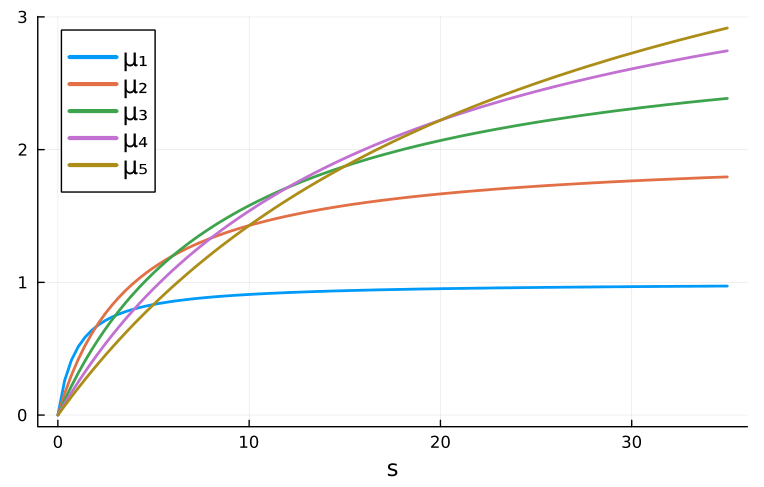

In [4]:
file_name = "output/kinetics_n=5.pdf"
print_figure([file_name], [400])

##### Solutions for Model 1

  *  $ J(u):=-\displaystyle\int_0^T P\big(x(t),u(t)\big) \; d t $

  * $ \displaystyle\frac{1}{T}\int_0^T S(x(t)) d t \ \leq \ \alpha$

Comparison of the static and dynamic solution for several values of $c$



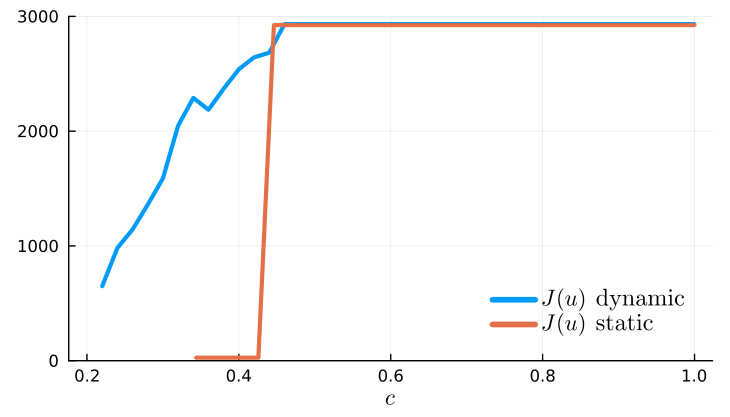

In [15]:
file_name = "output/model 1/comp1.pdf"
print_figure([file_name], [500])

Solutions for
 
|$c=0.25$|$c=0.3$|
|--------|-------|
|$c=0.4$ |$c=0.5$|


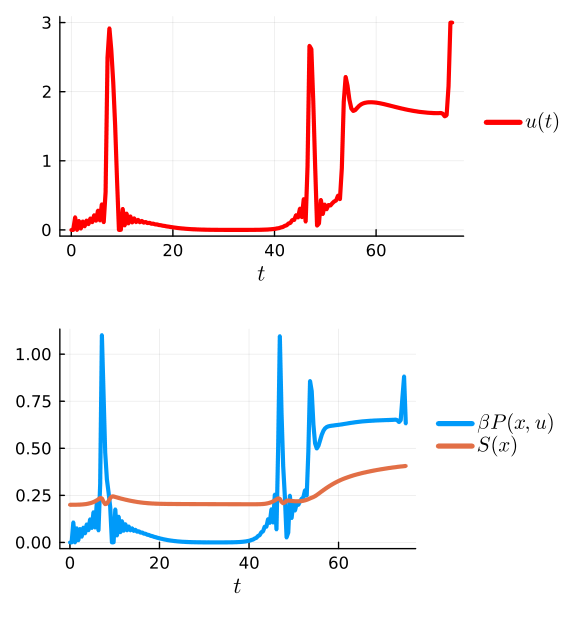
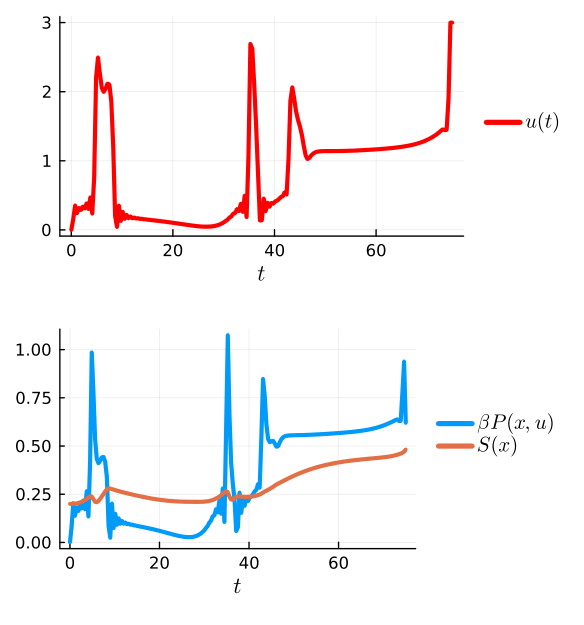


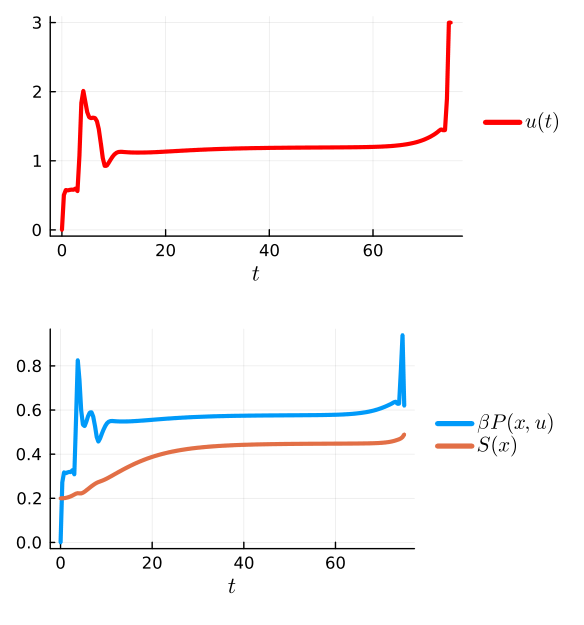
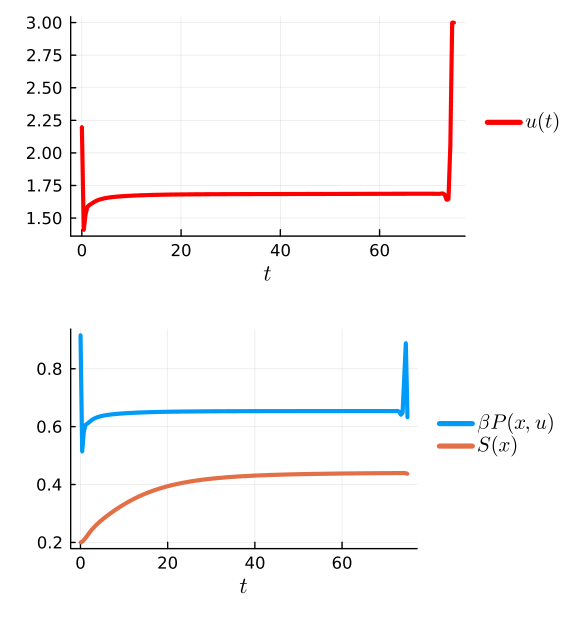

In [11]:
file_names= ["output/model 1/OCP1c=0-25.pdf","output/model 1/OCP1c=0-30.pdf"]
print_figure(file_names, [400,400])
file_names= ["output/model 1/OCP1c=0-40.pdf","output/model 1/OCP1c=0-50.pdf"]
print_figure(file_names, [400,400])

##### Solutions for Model 2
  *  $ J(u):=\displaystyle\int_0^T S(x(t)) \; d t $

  * $\displaystyle\frac{1}{T}\int_0^T P\big(x(t),u(t)\big) d t \ \geq \ \beta$


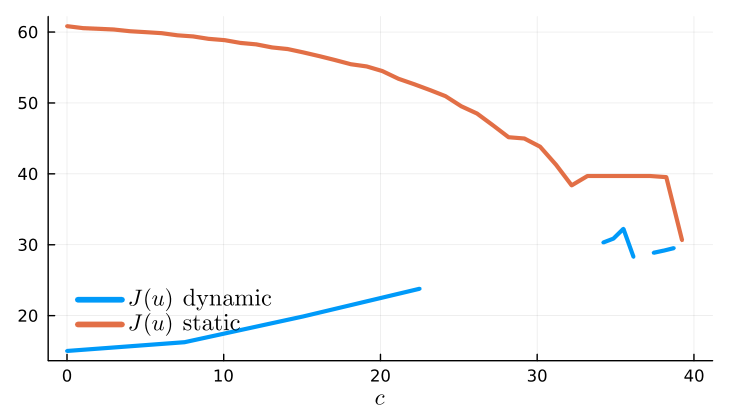

In [12]:
file_name = "output/model 2/comp1.pdf"
print_figure([file_name], [500])

Solutions for
 
|$c=0$|$c=7.5$|
|--------|-------|
|$c=22.5$ |$c=38.5$|


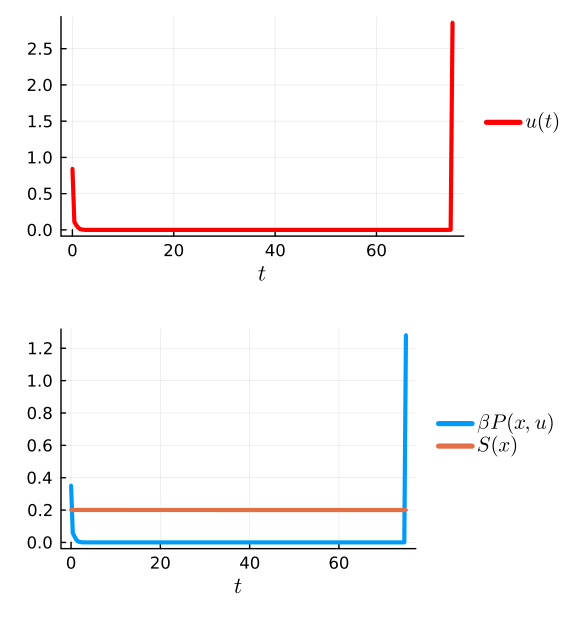
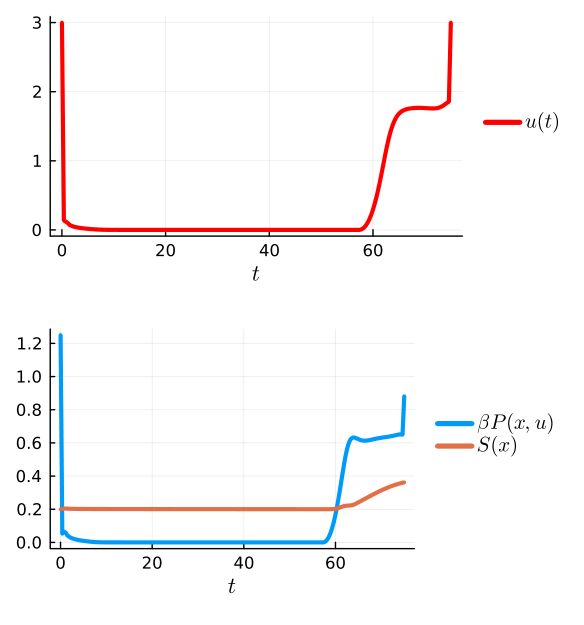


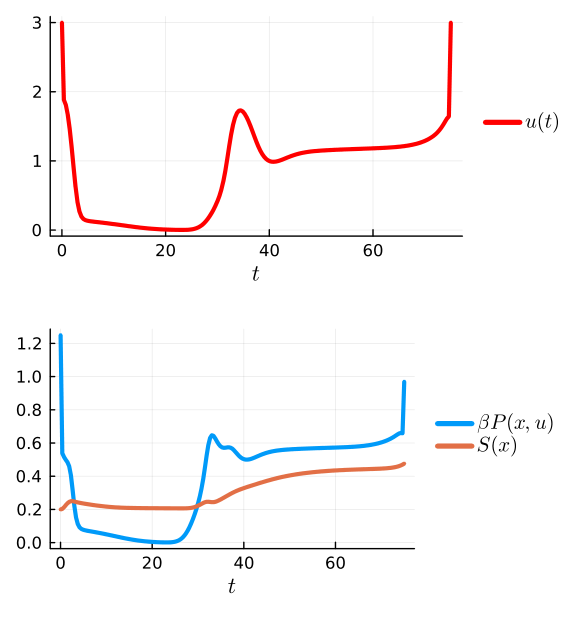
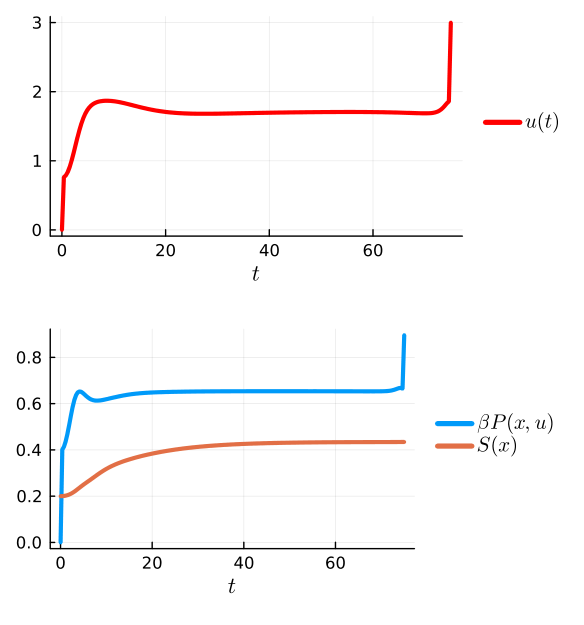

In [14]:
file_names= ["output/model 2/OCP1c=0.pdf","output/model 2/OCP1c=7-5.pdf"]
print_figure(file_names, [400,400])
file_names= ["output/model 2/OCP1c=22-5.pdf","output/model 2/OCP1c=38-5.pdf"]
print_figure(file_names, [400,400])

### Model with constraint for each  $t\in[0,T]$

\begin{equation}
    \left\lbrace \begin{array}{lllll}
    &\displaystyle\min_{u(\cdot)\in [0, u_{\max}]} \ \ J(u) 
    \\
    \\
    \text{s.t.}&\\
    &\dot{x}(t) = \big(M(s(t))-u(t)I_n+\varepsilon Z\big)x(t), \\
    \\
       & \dot{s}(t) = - \displaystyle\sum_{j=1}^n\frac{ \mu_j(s(t))x_j(t)}{Y_j}+ u(t)(s_{in}-s(t))
    \end{array}
    \right.
\end{equation}

* Model 1 :

  *  $ J(u):=-\displaystyle\int_0^T P\big(x(t),u(t)\big) \; d t $

  * $  S(x(t)) \ \leq \ \alpha, \quad \forall t\geq 0$

* Model 2 :

  *  $ J(u):=\displaystyle\int_0^T S(x(t)) \; d t $

  * $P\big(x(t),u(t)\big) \ \geq \ \beta, \quad \forall t\geq 0$

##### Solutions for Model 1

  *  $ J(u):=-\displaystyle\int_0^T P\big(x(t),u(t)\big) \; d t $

  * $  S(x(t)) \ \leq \ \alpha, \quad \forall t\geq 0$

Comparison of the static and dynamic solution for several values of $c$



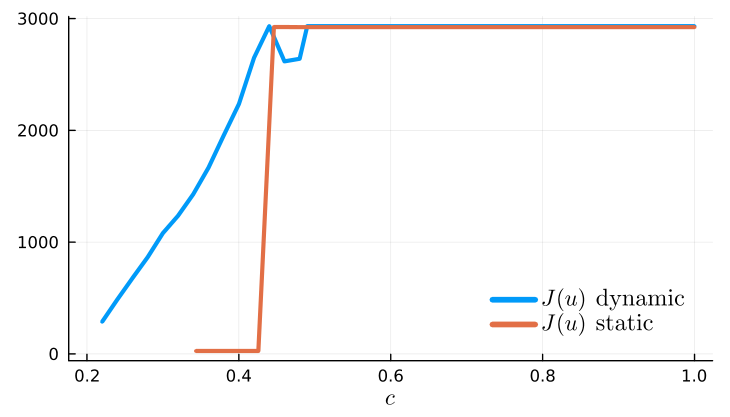

In [16]:
file_name = "output/model 1/comp2.pdf"
print_figure([file_name], [500])

Solutions for
 
|$c=0.22$|$c=0.36$|
|--------|-------|
|$c=0.46$ |$c=0.49$|


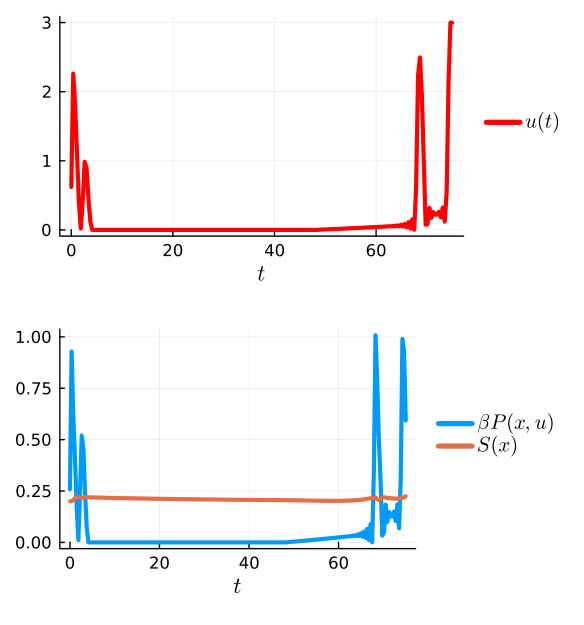
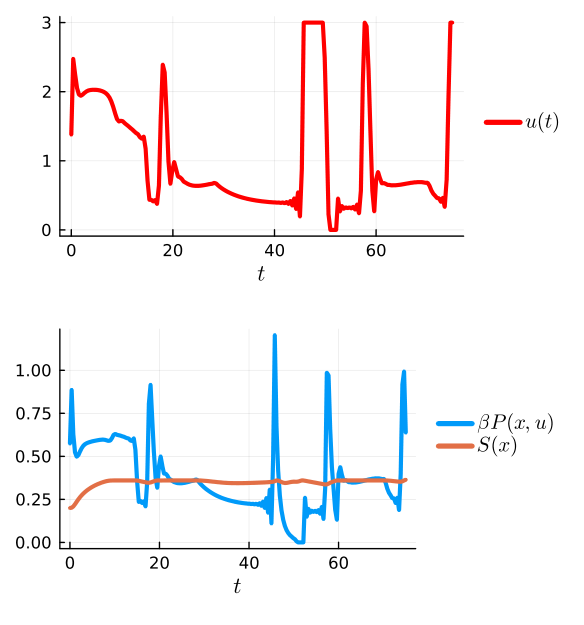


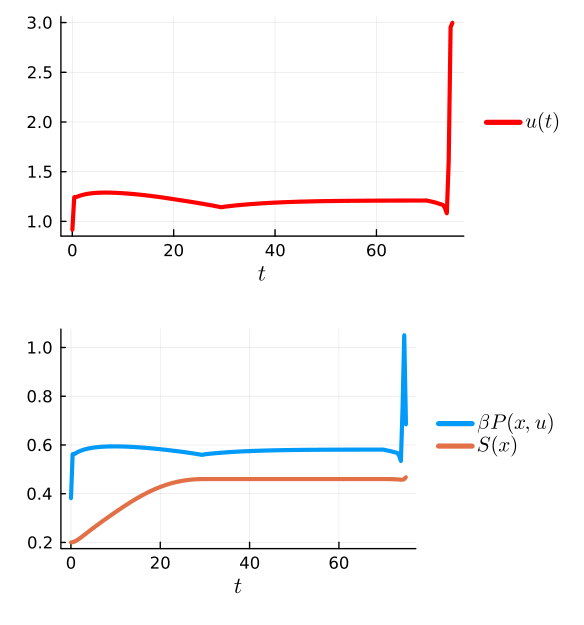
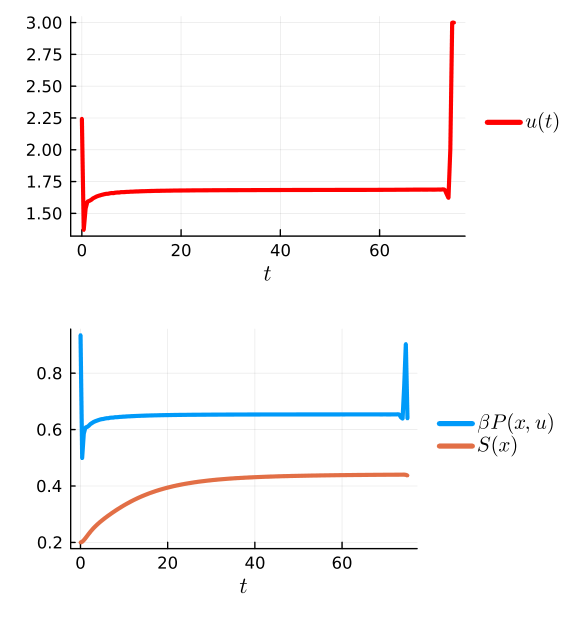

In [17]:
file_names= ["output/model 1/OCP2c=0-22.pdf","output/model 1/OCP2c=0-36.pdf"]
print_figure(file_names, [400,400])
file_names= ["output/model 1/OCP2c=0-46.pdf","output/model 1/OCP2c=0-49.pdf"]
print_figure(file_names, [400,400])

##### Solutions for Model 2
  *  $ J(u):=\displaystyle\int_0^T S(x(t)) \; d t $

  * $P\big(x(t),u(t)\big)\ \geq \ \beta, \quad \forall t\geq 0$


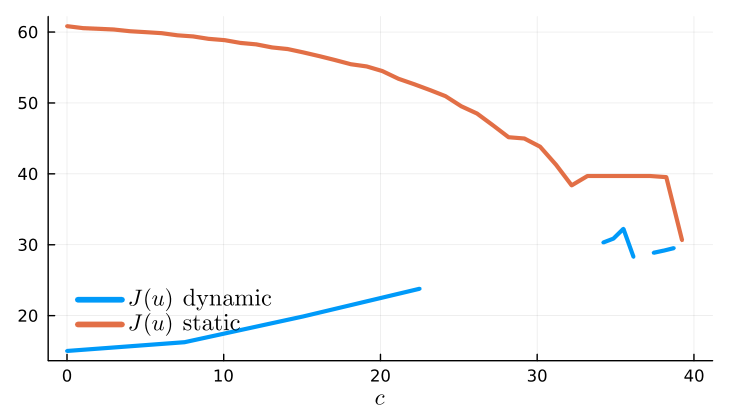

In [ ]:
file_name = "output/model 2/comp2.pdf"
print_figure([file_name], [500])

Solutions for
 
|$c=0$|$c=7.5$|
|--------|-------|
|$c=22.5$ |$c=38.5$|


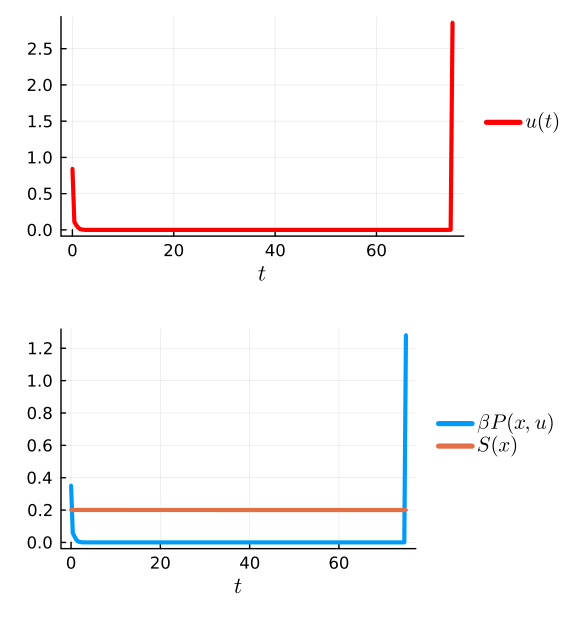
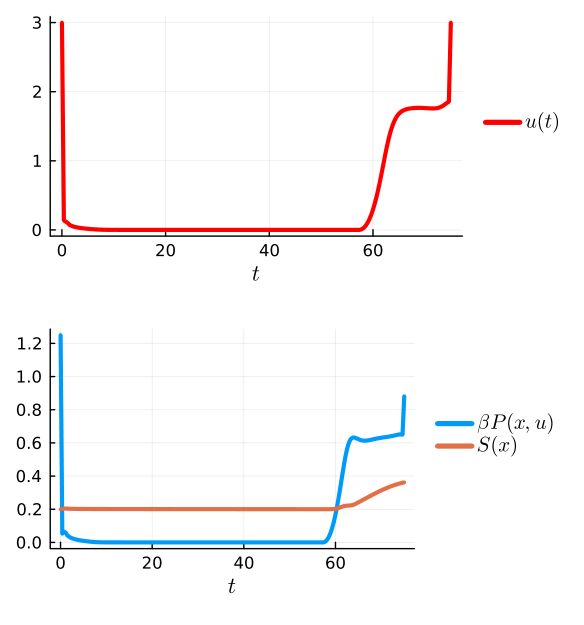


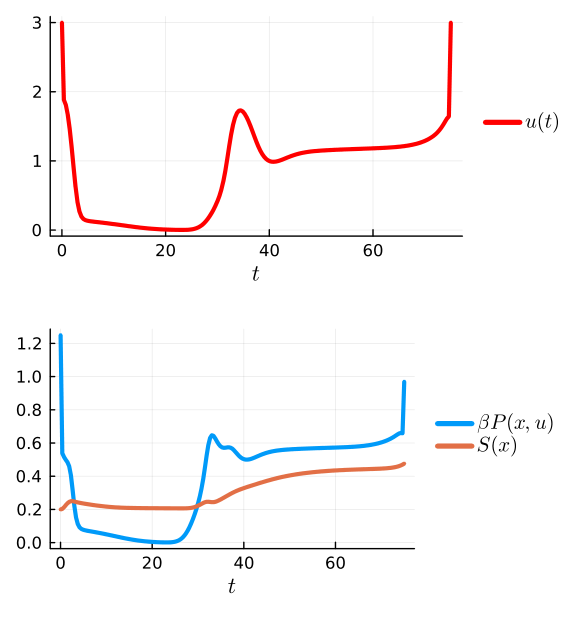
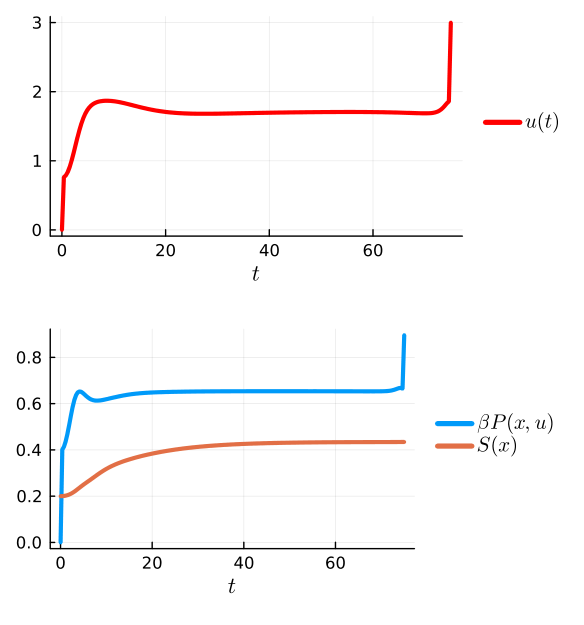

In [ ]:
file_names= ["output/model 2/OCP1c=0.pdf","output/model 2/OCP1c=7-5.pdf"]
print_figure(file_names, [400,400])
file_names= ["output/model 2/OCP1c=22-5.pdf","output/model 2/OCP1c=38-5.pdf"]
print_figure(file_names, [400,400])

### Model with constraint for each  $t\in[0,T]$

\begin{equation}
    \left\lbrace \begin{array}{lllll}
    &\displaystyle\min_{u(\cdot)\in [0, u_{\max}]} \ \ J(u) 
    \\
    \\
    \text{s.t.}&\\
    &\dot{x}(t) = \big(M(s(t))-u(t)I_n+\varepsilon Z\big)x(t), \\
    \\
       & \dot{s}(t) = - \displaystyle\sum_{j=1}^n\frac{ \mu_j(s(t))x_j(t)}{Y_j}+ u(t)(s_{in}-s(t))
    \end{array}
    \right.
\end{equation}

* Model 1 :

  *  $ J(u):=-\displaystyle\int_0^T P\big(x(t),u(t)\big) \; d t $

  * $  S(x(t)) \ \leq \ \alpha, \quad \forall t\geq 0$

* Model 2 :

  *  $ J(u):=\displaystyle\int_0^T S(x(t)) \; d t $

  * $P\big(x(t),u(t)\big) \ \geq \ \beta, \quad \forall t\geq 0$

##### Solutions for Model 1

  *  $ J(u):=-\displaystyle\int_0^T P\big(x(t),u(t)\big) \; d t $

  * $  S(x(t)) \ \leq \ \alpha, \quad \forall t\geq 0$

Comparison of the static and dynamic solution for several values of $c$
